# Introdução ao  Python com Ciência de Dados

Professores:
* Felipe Cavenaghi
* Rafael Stoffalette Joao

## Ementa
1. Python: 
  * Ambiente de Programação
  * tipos de dados, sequências e operações, estruturas de controle e repetição
  * Python: referências, funções, funções avançadas e comprehention
  * Python: I/O e noções básicas de classes e objetos
2. Numpy: 
   * array, slicing, fancy index, copy e view
   * operações com array, broadcasting
3. Pandas: 
   * dataframes, series, index, Pandas I/O (csv, json, excell)
   * limpeza de dados
4. Matplotlib:  construção de gráficos
5. Introdução ao aprendizado de máquina
6. Introdução ao processamento de linguagem Natural com NTKL

# Aula 07: Machine Learning (Aprendizado de máquina)



# Tópicos 
##  Pré-processamento de dados
* Normalização
* Binarização
* Discretização
* Detecção de outliers
* Remoção de ruídos

## Classificação de dados

## Regressão

## Agrupamento de dados

## Identificação de padrões

## Regras de associação

Em 1959, Arthur Samuel definiu aprendizado de máquina
como o "campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados"

- Biblioteca sklearn
- import sklearn

https://scikit-learn.org/stable/search.html?q=sklearn

In [ ]:
import sklearn.preprocessing as etl

import numpy as np


In [ ]:
from sklearn.impute import SimpleImputer
#strategy= mean, median, most_frequent, constant
# imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean = SimpleImputer(strategy='constant',fill_value=9)

Dados = [[np.nan, 43, 2], [1, np.nan, 6.3], [0.1, True, 1.7]]
print(imp_mean.fit_transform(Dados))



[[ 9.  43.   2. ]
 [ 1.   9.   6.3]
 [ 0.1  1.   1.7]]


In [ ]:
from sklearn import preprocessing

entradaBruta = [[1.0, 12.1, 14.5, 2.1, 1.8]]
entradaNormalizada = preprocessing.normalize(entradaBruta)


print(entradaNormalizada)


[[0.05232018 0.63307416 0.75864259 0.10987238 0.09417632]]


![Picture title](../imgs/image-20201211-092256.png)

In [ ]:
from sklearn import preprocessing

entradaBruta = [[1.0, 12.1, 14.5, 2.1, 1.8]]

binarizer = preprocessing.Binarizer(threshold=1.9)
entradaBinaria = binarizer.transform(entradaBruta)

print(entradaBinaria)

[[0. 1. 1. 1. 0.]]


In [ ]:
from sklearn import preprocessing


entradaBruta = [[1.0, 12.1, 1.5, 0.1, 1.8],
                [2.0, 6.1, 14.5, 120.1, 1.8],
                [6.0, 2.1, 4.5, 222.1, 1.8]
                ]
discretizer = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
discretizer.fit(entradaBruta)
entradaDiscreta = discretizer.transform(entradaBruta)
print(entradaDiscreta)

[[0. 2. 0. 0. 0.]
 [0. 1. 2. 1. 0.]
 [2. 0. 0. 2. 0.]]
/opt/venv/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:168: UserWarning: Feature 4 is constant and will be replaced with 0.
  "replaced with 0." % jj)


In [ ]:
import pandas as pd
dados  = pd.read_csv('../dataset/clima.csv')
dados.head()


,Data,TempMaxima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Precipitacao,TempMinima
0,13/04/2015,32.6,3.54444,4.63943,78.00,0.0,16.4
1,14/04/2015,30.4,3.54444,4.63943,86.50,0.0,16.2
2,15/04/2015,29.6,3.54444,4.63943,88.25,0.0,19.0
3,16/04/2015,32.6,3.54444,4.63943,83.00,0.0,16.4
4,17/04/2015,32.6,3.54444,4.63943,82.25,0.0,19.2


In [ ]:
tempMAx       = dados['TempMaxima']
insolacao     = dados['Insolacao']
umidade       = dados['Umidade Relativa Media']
precipicatao  = dados['Precipitacao']
tempMinima    = dados['TempMinima']


umidadeNormalizada = preprocessing.normalize([umidade])
print(dados['TempMaxima'])


dados['TempMaxima'] = [(celsius * 1.8) + 32 for celsius in dados['TempMaxima']]
print(dados['TempMaxima'])



print(umidadeNormalizada)

0       32.6
1       30.4
2       29.6
3       32.6
4       32.6
        ... 
1627    35.4
1628    35.6
1629    34.8
1630    36.2
1631    34.2
Name: TempMaxima, Length: 1632, dtype: float64
0       90.68
1       86.72
2       85.28
3       90.68
4       90.68
        ...  
1627    95.72
1628    96.08
1629    94.64
1630    97.16
1631    93.56
Name: TempMaxima, Length: 1632, dtype: float64
[[0.02722627 0.03019323 0.03080408 ... 0.02467419 0.02467419 0.02467419]]


In [ ]:
# dados  = pd.read_csv('dataset/zoo.csv') #facil ver correlações
dados  = pd.read_csv('../dataset/clima.csv') #nada se correlaciona
# dados  = pd.read_csv('dataset/heartAttack.csv') #tudo se correlaciona
dados.corr().style.background_gradient(cmap='Blues')

,TempMaxima,Insolacao,Evaporacao Piche,Umidade Relativa Media,Precipitacao,TempMinima
TempMaxima,1.000000,-0.004619,0.341988,-0.386349,0.033669,0.240950
Insolacao,-0.004619,1.000000,-0.000534,-0.013156,-0.002152,-0.039124
Evaporacao Piche,0.341988,-0.000534,1.000000,-0.359570,-0.054555,-0.057398
Umidade Relativa Media,-0.386349,-0.013156,-0.359570,1.000000,0.076334,0.193027
Precipitacao,0.033669,-0.002152,-0.054555,0.076334,1.000000,0.066282
TempMinima,0.240950,-0.039124,-0.057398,0.193027,0.066282,1.000000


In [ ]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
import numpy as np


DADOS = np.array([[1.8],[2.1],[1.83],[1.45],[1.52],[1.86]])
CLASSE = np.array(["YES", "YES", "YES", "NO", "NO", "NO"])


classificador = GaussianNB() #lida com valores numéricos contínuos
classificador.fit(DADOS, CLASSE) # treinamento

print(classificador.predict([[1.42]]))

['NO']


In [ ]:
dados  = pd.read_csv('../dataset/zoo.csv') #facil ver correlações
# http://archive.ics.uci.edu/ml/datasets/Zoo

from sklearn.naive_bayes import CategoricalNB #lida com valores categóricos


dados.head()
classes = dados.iloc[:,-1]
dados = dados.iloc[:,1:17]



nb = CategoricalNB()
nb.fit(dados, classes)

# categorias =['marisco', 'caranguejo', 'lagosta', 'lagosta', 'polvo', 'escorpião', 'vespa do mar', 'lesma', 'estrela do mar', 'verme']
# print([categorias[i] for i in classificacoes])

nb.predict(dados[1:3])


array([1, 4])

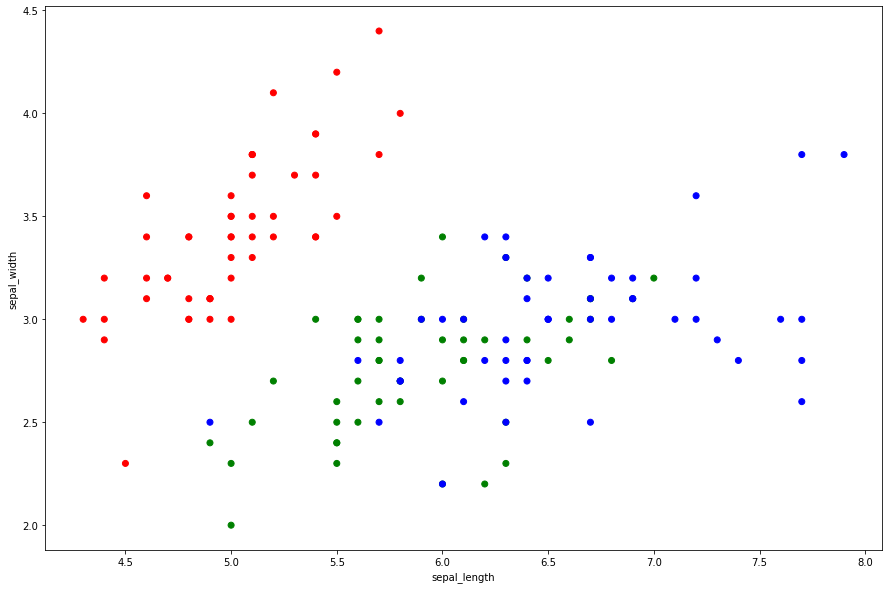

In [ ]:
import pandas as pd


iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataframe = pd.read_csv(iris, sep=',') 
dataframe.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"] 
classes = dataframe['class']

classes.head()
# dataframe.iloc[:,4]
# Load the data


from matplotlib import pyplot as plt
cores ={'Iris-setosa':'r','Iris-versicolor':'g','Iris-virginica':'b'}
coresClasses = [cores[i] for i in classes]


x_index = 0
y_index = 1

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(dataframe.iloc[:, x_index], dataframe.iloc[:, y_index],c=coresClasses)
ax.set_xlabel(dataframe.columns[x_index])
ax.set_ylabel(dataframe.columns[y_index])

fig.show()

# Ajudinha para particionar os dados...

## from sklearn.model_selection import train_test_split


In [ ]:

from sklearn.model_selection import train_test_split

dados = [[1,2],
         [2,1],
         [2,2],
         [1,1],
         [0,1],
         [1,22],
         [11,2],
         [1,20]]

classes = [1,1,0,1,1,1,1,0]

Dados_treino, Dados_teste, Classes_treino, Classes_teste = train_test_split(dados, classes,shuffle=False)

# Dados_treino
#Dados_teste
# Classes_treino
Classes_teste

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
dados = load_iris()


dados_Treino, dados_Teste, classes_Treino, classes_Teste = train_test_split(dados.data, dados.target, train_size=0.8)

classesNomes = list(data.target_names)


classificador = GaussianNB()
classificador.fit(dados_Treino, classes_Treino)


predicted = clf.predict(dados_Teste)

print(predicted) 
print(classes_Teste) 




In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

atributosNomes =['sepal length','sepal width','petal length','petal width']
classesNomes = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(15, 10),dpi=100)

X, y = load_iris(return_X_y=True)

c45 = tree.DecisionTreeClassifier()

c45 = c45.fit(X, y)

tree.plot_tree(c45,filled=True,feature_names = atributosNomes,class_names=classesNomes)
fig.savefig('arvore.png')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


alturasTreinamento = [ # a base de dados 2Dimensional é composta pela altura de indivíduos e a descrição se usam ou não sapatos na hora da medida
    [1.50,0], 
    [1.51,1], 
    [1.82,0], 
    [1.93,0]
]


classificacao = [0, 0, 1, 1]  #0 é baixa e 1 é a classe para pessoas altas
classificacaoTAG =['baixa','alta']



classificadorKNN = KNeighborsClassifier(n_neighbors=3)  # construção do classificador

classificadorKNN.fit(alturasTreinamento, classificacao) # Construção do modelo de treinamento


##Resultados##
print("\n A pessoa submetida ao teste é classificada como: "+
      str(classificacaoTAG[int(
          classificadorKNN.predict([[1.41,1]]))]))

print("\n Probabilidades")
print(classificadorKNN.predict_proba([[1.41,1]]))

# Random forest

##  No arquivo importancia_dos_Atributos.ipynb tem um exemplo desse classificador e mais tips

# Regressão...

## Nada diferente do que ja vimos. Mas agora, com números!

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)


regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)


print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0]]))

[0.18146984 0.81473937 0.00145312 0.00233767]
[-8.32987858]


# Métricas de avaliação dos classificadores...

## Ver arquivo metricas.ipynb


In [ ]:
from sklearn.metrics import confusion_matrix

classeEsperada = [2, 0, 2, 2, 0, 1]
ClassePredita = [0, 0, 2, 2, 0, 2]
confusion_matrix(classeEsperada, ClassePredita)

# TEM MAIS...

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

# Atividade de fixação


# Base de dados heart.dataset.csv
## Pré-processar os dados para fazer a classificação

- montar uma matriz de confusão
- apresentar estimativas da classificação
